### Import libs

In [1]:
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

### Tickers

AAPL : Apple

TSLA : Tesla

JNJ : Johnson & Johnson

In [2]:
ticker = 'TSLA'

### Models

SVM

RF

In [3]:
model = 'SVM'

In [4]:
df = pd.read_csv('./data_clean/' + ticker + '.csv')
df = df.sort_values('date')
df = df.drop(['open','high','low','close','volume'], axis=1)

df = df.query('date <= "2019-10-01"')
df = df.reset_index(drop=True)

In [5]:
df['avg_close'] = 0.0
df['sentiment'] = 0.0

### Create average close price feature
Average is based on [up to] the previous 5 days (not including the current day)

In [6]:
days = 5

for i, _ in df.iterrows():
    if i:
        df['avg_close'][i] = sum(df['adj close'][i - k] for k in range(1, i + 1 if i < (days + 1) else (days + 1))) / (i if i < (days + 1) else days)

### Add sentiment feature
Note that the sentiments were pre-computed and stored in a CSV

In [7]:
sent_df = pd.read_csv('news_sentiments.csv')
sent_df = sent_df.loc[sent_df['ticker'] == ticker]

In [8]:
for i, _ in df.iterrows():
    s = sent_df.loc[sent_df['release_date'] == df['date'][i]]['sentiment']
    df['sentiment'][i] = s.iloc[0] if len(s) else 0.0

### Check data

In [9]:
df.head(n=15)

,date,adj close,avg_close,sentiment
0,2015-01-02,219.309998,0.000000,1.037691
1,2015-01-05,210.089996,219.309998,0.000000
2,2015-01-06,211.279999,214.699997,-0.348619
3,2015-01-07,210.949997,213.559998,0.000000
4,2015-01-08,210.619995,212.907497,0.000000
5,2015-01-09,206.660004,212.449997,0.000000
6,2015-01-12,202.210007,209.919998,-0.504733
7,2015-01-13,204.250000,208.344000,6.817859
8,2015-01-14,192.690002,206.938000,0.117636
9,2015-01-15,191.869995,203.286002,0.000000


In [10]:
df.describe()

,adj close,avg_close,sentiment
count,1195.000000,1195.000000,1195.000000
mean,265.875222,265.629904,0.100961
std,54.546312,54.686897,0.820522
min,143.669998,0.000000,-8.286661
25%,219.614998,220.328999,-0.122139
50%,254.860001,253.546002,0.000000
75%,312.720001,314.073999,0.129306
max,385.000000,378.437994,10.357318


In [11]:
print('Dimension of data:', df.shape)

Dimension of data: (1195, 4)


### Plot Data

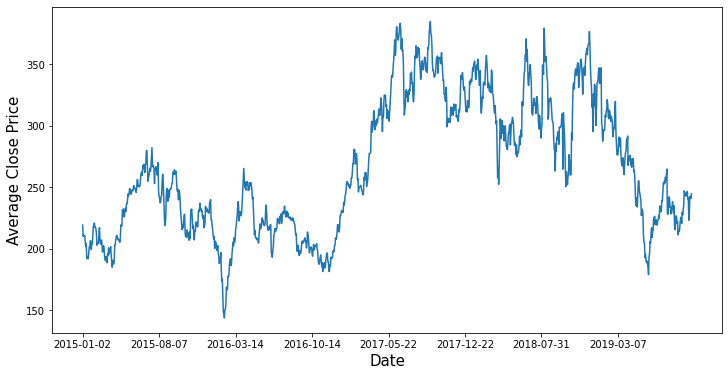

In [12]:
def plotStocks(data, dates, xticks, legend=False):
    plt.figure(figsize=(12,6))
    for datum in data:
        plt.plot(datum[0], datum[1], **datum[2])
    plt.xlabel('Date', fontsize=15)
    plt.ylabel('Average Close Price', fontsize=15)
    plt.xticks(np.arange(0, len(dates), xticks))
    plt.legend() if legend else None
    plt.show()

stock_data = [(df['date'], df['adj close'], {})]
plotStocks(stock_data, df['date'], 150)

### Create feature set and target vector

In [13]:
X = df.drop(labels=['adj close'], axis=1)
y = df['adj close']

print('Dimension of feature matrix:', X.shape)
print('Dimension of target vector:', y.shape)

Dimension of feature matrix: (1195, 3)
Dimension of target vector: (1195,)


### Create test and train datasets

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

dates = X_test['date']

X_train = X_train.drop(labels=['date'], axis=1)
X_test = X_test.drop(labels=['date'], axis=1)

### Train Model

#### SVM regression

In [ ]:
# SVM hyperparameter tuning
# param_grid = {'kernel': ('linear','poly','rbf','sigmoid'),
#               'C': [1,5,10],
#               'degree': [3,8],
#               'coef0': [0.01,10,0.5],
#               'gamma': ('auto','scale')}
# svr = SVR()
# grids = GridSearchCV(svr, param_grid, cv=5, verbose=10)
# grids.fit(X_train, y_train)
# params_optimal = grids.best_params_

# svr = SVR(params_optimal)
# y_pred = svr.fit(X_train, y_train).predict(X_test)
# svm_confidence = svr.score(X_test, y_test)
# print('SVM Confidence:', svm_confidence)

if model == 'SVM':
    svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
    y_pred = svr.fit(X_train, y_train).predict(X_test)
    svm_confidence = svr.score(X_test, y_test)
    print('SVM Confidence:', svm_confidence)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear, score=0.558, total=   0.6s
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear ............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear, score=0.812, total=   0.7s
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear ............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.2s remaining:    0.0s


[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear, score=0.949, total=   0.5s
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear ............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.8s remaining:    0.0s


[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear, score=0.733, total=   0.6s
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear ............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.4s remaining:    0.0s


[CV]  C=1, coef0=0.01, degree=3, gamma=auto, kernel=linear, score=0.692, total=   0.7s
[CV] C=1, coef0=0.01, degree=3, gamma=auto, kernel=poly ..............


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.1s remaining:    0.0s


#### Random forests regression

In [ ]:
if model == 'RF':
    reg = RandomForestRegressor()
    y_pred = reg.fit(X_train, y_train).predict(X_test)

In [ ]:
stock_data = [(df['date'], df['adj close'], {'color': 'green', 'label': 'Data'}),
              (dates, y_pred, {'color': 'red', 'label': 'Predicted'})]
plotStocks(stock_data, df['date'], 150, True)

In [ ]:
stock_data = [(dates, y_test, {'color': 'green', 'label': 'Data'}),
              (dates, y_pred, {'color': 'red', 'label': 'Predicted'})]
plotStocks(stock_data, dates, 50, True)

In [ ]:
# reg = RandomForestRegressor()

# n = len(X_test)
# to_pred = pd.DataFrame(data=[[0,0.0,0.0]], columns=['sentiment', 'avg_close'])
# y_pred = np.array([])

# data = X_train.copy(deep=True)
# prices = y_train.copy(deep=True).to_numpy()

# def prepNextInstance(to_pred, prices, l):
#     to_pred['sentiment'][0] = 1 if prices[l - 1] > prices[l - 2] else -1
#     to_pred['avg_close'][0] = prices[l - 1] / prices[l - 2]
#     to_pred['avg_close'][0] = sum(prices[i] for i in range(l - 5, l)) / 5

# for _ in range(n):
#     prepNextInstance(to_pred, prices, len(prices))
#     val = reg.fit(data, prices).predict(to_pred)
#     data = data.append(to_pred)
#     y_pred = np.append(y_pred, val)
#     prices = np.append(prices, val)

In [ ]:
# stock_data = [(dates, y_test, {'color': 'green', 'label': 'Data'}),
#               (dates, y_pred, {'color': 'red', 'label': 'Predicted'})]
# plotStocks(stock_data, dates, 50, True)

### Evaluate Model

In [ ]:
err = mean_squared_error(y_test, y_pred)
print(err)

In [ ]:
err = mean_absolute_error(y_test, y_pred)
print(err)